# In Class Notebook, Map Week


You can always find here: https://github.com/UIUC-iSchool-DataViz/is445_bcubcg_fall2025/blob/master/week08/inClass_week08.ipynb  


In [1]:
import bqplot

In [2]:
# 1. data
shape_data = bqplot.topo_load('map_data/WorldMap.json')

In [3]:
# 2. scales/axis
sc_geo = bqplot.Mercator() # we know this is not the best projection!

In [5]:
# 3. Marks
#bqplot.Map?
shape_map = bqplot.Map(map_data = shape_data, scales={'projection':sc_geo})

In [6]:
# 4. no interactivity

In [9]:
#5. into a figure
fig = bqplot.Figure(marks=[shape_map], fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

In [10]:
# 1. data -- load US states
shape_data = bqplot.topo_load('map_data/USStatesMap.json')

# 2. scales/axis
sc_geo = bqplot.AlbersUSA() # US-specific projection

# 3. marks
shape_map = bqplot.Map(map_data=shape_data, scales={'projection':sc_geo})

# figure
fig = bqplot.Figure(marks=[shape_map], fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

In [13]:
!ls /opt/anaconda3/pkgs/bqplot-0.12.30-pyhd8ed1ab_0/site-packages/bqplot/map_data

EuropeMap.json     USCountiesMap.json USStatesMap.json   WorldMap.json


## Geopandas (a little easier to deal with)

In [14]:
import geopandas

In [17]:
import geodatasets

In [18]:
geodatasets.get_path('ny bb')

'/Users/jnaiman/Library/Caches/geodatasets/nybb_16a.zip.unzip/nybb_16a/nybb.shp'

In [19]:
gdf = geopandas.read_file(geodatasets.get_path('ny bb'))

In [20]:
gdf

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


<AxesSubplot:>

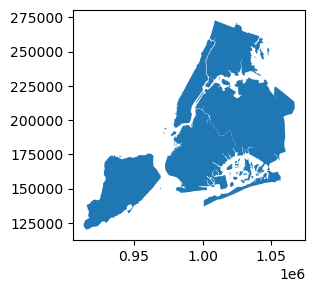

In [23]:
gdf.plot(figsize=(3,3))

In [24]:
gdf.crs # crs = coordinate reference system

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US survey foot)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [25]:
gdf.to_crs('epsg:4326').crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

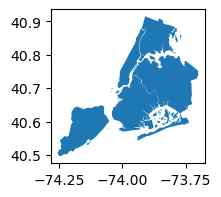

In [27]:
gdf.to_crs('epsg:4326').plot(figsize=(2,2))

In [29]:
#gdf_coastlines = geopandas.read_file('https://www2.census.gov/geo/tiger/TIGER2024/COASTLINE/tl_2024_us_coastline.zip')
# can't use US-based federal data because of shutdown

In [30]:
gdf_councils = geopandas.read_file('https://gisportal.champaignil.gov/ms/rest/services/Open_Data/Open_Data/MapServer/1/query?outFields=*&where=1%3D1&f=geojson')

In [31]:
gdf_councils

,OBJECTID_1,District,Council_me,Shape.STArea(),Shape.STLength(),geometry
0,1219,1,Davion Williams,1.991748e+08,133825.673297,"POLYGON ((-88.27716 40.16364, -88.27732 40.163..."
1,1220,3,Shauna Clayborn,1.382327e+08,73289.747391,"POLYGON ((-88.28312 40.13667, -88.28372 40.136..."
2,1221,2,Bob Pollett,7.472444e+07,50905.604100,"POLYGON ((-88.2468 40.11261, -88.24763 40.1126..."
3,1222,5,Vanna Pianfetti,1.776407e+08,204013.082479,"POLYGON ((-88.31441 40.11698, -88.31441 40.116..."
4,1223,4,Michael Foellmer,6.308923e+07,58697.438268,"POLYGON ((-88.22877 40.11638, -88.22884 40.116..."


<AxesSubplot:>

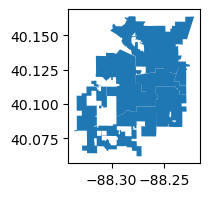

In [33]:
gdf_councils.plot(figsize=(2,2))

In [34]:
gdf_councils.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

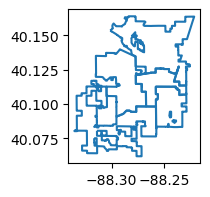

In [36]:
gdf_councils.boundary.plot(figsize=(2,2))

In [37]:
gdf_councils.bounds

,minx,miny,maxx,maxy
0,-88.301247,40.113461,-88.221225,40.163956
1,-88.315071,40.090758,-88.267072,40.139863
2,-88.257818,40.083182,-88.228485,40.112653
3,-88.335351,40.061898,-88.257012,40.116995
4,-88.276904,40.098142,-88.228768,40.127264


In [38]:
gdf_councils.centroid

/var/folders/t7/bwcvd_4177q4872gxghn7p9r0000gq/T/ipykernel_91690/2492373049.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_councils.centroid


0    POINT (-88.25684 40.14254)
1    POINT (-88.29004 40.11719)
2    POINT (-88.24455 40.09783)
3    POINT (-88.29863 40.08609)
4    POINT (-88.25577 40.11441)
dtype: geometry

In [39]:
gdf_councils.describe()

,OBJECTID_1,Shape.STArea(),Shape.STLength()
count,5.000000,5.000000e+00,5.000000
mean,1221.000000,1.305724e+08,104146.309107
std,1.581139,6.052553e+07,64626.884912
min,1219.000000,6.308923e+07,50905.604100
25%,1220.000000,7.472444e+07,58697.438268
50%,1221.000000,1.382327e+08,73289.747391
75%,1222.000000,1.776407e+08,133825.673297
max,1223.000000,1.991748e+08,204013.082479


In [40]:
gdf_apts = geopandas.read_file('https://gisportal.champaignil.gov/ms/rest/services/Open_Data/Open_Data/MapServer/8/query?outFields=*&where=1%3D1&f=geojson')

In [42]:
gdf_apts.columns

Index(['OBJECTID', 'Address', 'Parcel', 'Units', 'Stories', 'UniqueID',
       'Building_Name', 'Complex_Name', 'Case_Number', 'Building_Type',
       'Status', 'Last_Date', 'Comments', 'Safety_Comments', 'Fire_Alarms',
       'Sprinkler', 'Managing_Company', 'MFRecyclingStatus', 'Shape.STArea()',
       'Shape.STLength()', 'geometry'],
      dtype='object')

<AxesSubplot:>

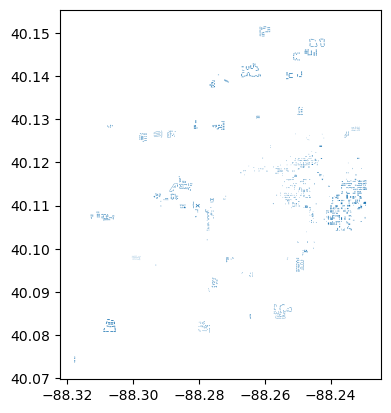

In [43]:
gdf_apts.plot()

In [44]:
gdf_apts['Stories'].unique()

array(['3', '3 ', '2', '1', '5', ' 1', ' 3', '6', ' 6', '4 ', '4', '20',
       ' 4', '24', '7', ' ', '8'], dtype=object)

In [45]:
import matplotlib.pyplot as plt

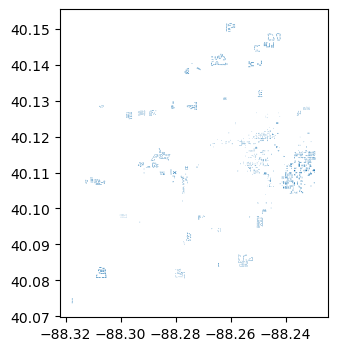

In [46]:
fig, ax = plt.subplots(figsize=(4,4))
gdf_apts.plot(ax=ax)
plt.show()

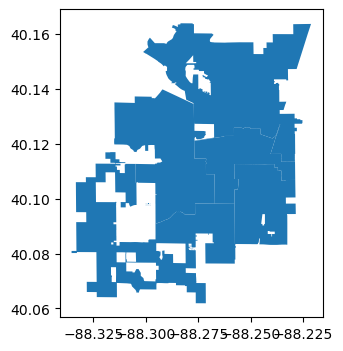

In [47]:
fig, ax = plt.subplots(figsize=(4,4))
gdf_councils.plot(ax=ax)
gdf_apts.plot(ax=ax)
plt.show()

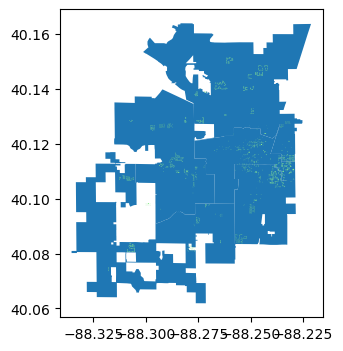

In [48]:
fig, ax = plt.subplots(figsize=(4,4))
gdf_councils.plot(ax=ax)
gdf_apts.plot(ax=ax, color='lightgreen')
plt.show()

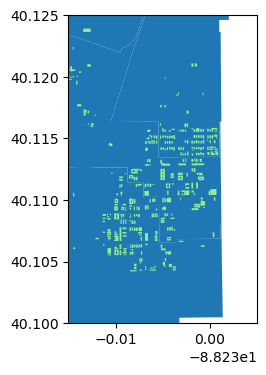

In [49]:
fig, ax = plt.subplots(figsize=(4,4))
gdf_councils.plot(ax=ax)
gdf_apts.plot(ax=ax, color='lightgreen')
ax.set_xlim(-88.245,-88.225)
ax.set_ylim(40.10, 40.125)
plt.show()

In [50]:
gdf_apts['Building_Type'].unique()

array(['Complex', 'Building', 'House', 'Over Commercial'], dtype=object)

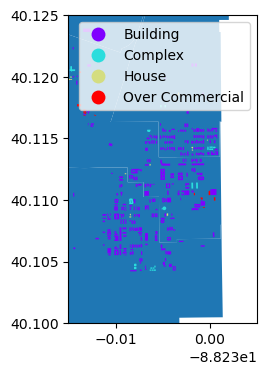

In [52]:
fig, ax = plt.subplots(figsize=(4,4))
gdf_councils.plot(ax=ax)
#gdf_apts.plot(ax=ax, color='lightgreen')
gdf_apts.plot(ax=ax, column='Building_Type', cmap='rainbow', legend=True)
ax.set_xlim(-88.245,-88.225)
ax.set_ylim(40.10, 40.125)
plt.show()

## Geopandas + contextily

In [53]:
import contextily as ctx

/opt/anaconda3/envs/DataViz/lib/python3.10/site-packages/contextily/tile.py:645: UserWarning: The inferred zoom level of 30 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


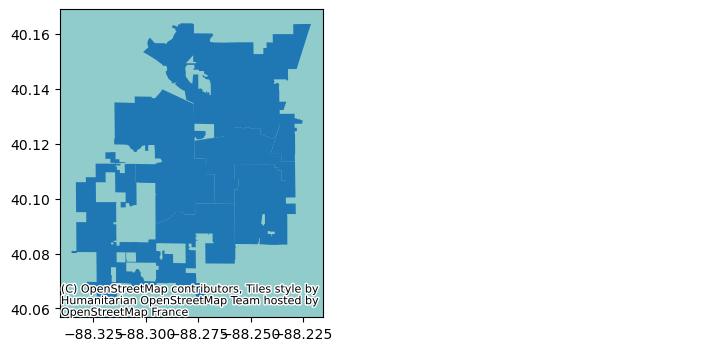

In [55]:
fig, ax = plt.subplots(figsize=(4,4))
gdf_councils.plot(ax=ax)
ctx.add_basemap(ax=ax)
plt.show()

In [57]:
#ctx.providers

/opt/anaconda3/envs/DataViz/lib/python3.10/site-packages/contextily/tile.py:645: UserWarning: The inferred zoom level of 30 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


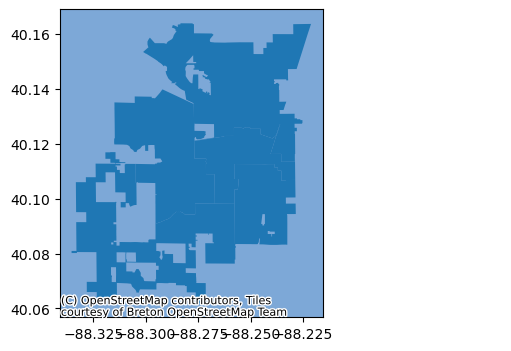

In [58]:
fig, ax = plt.subplots(figsize=(4,4))
gdf_councils.plot(ax=ax)
ctx.add_basemap(ax=ax, source=ctx.providers.OpenStreetMap.BZH)
plt.show()

In [59]:
gdf_councils.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [60]:
gdf_councils_new = gdf_councils.to_crs(epsg=3857)

In [61]:
gdf_councils_new.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

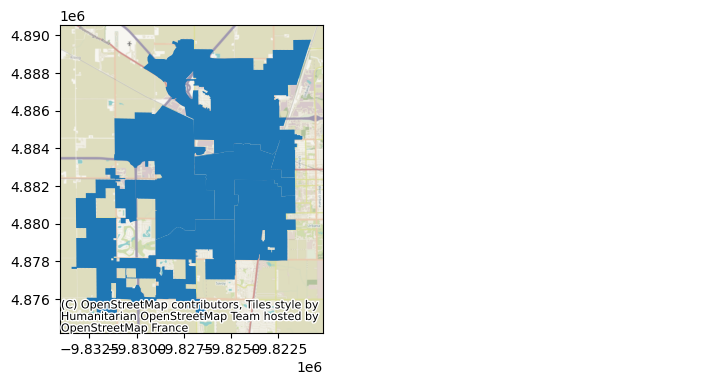

In [62]:
fig, ax = plt.subplots(figsize=(4,4))
gdf_councils_new.plot(ax=ax)
ctx.add_basemap(ax=ax) #, source=ctx.providers.OpenStreetMap.BZH)
plt.show()

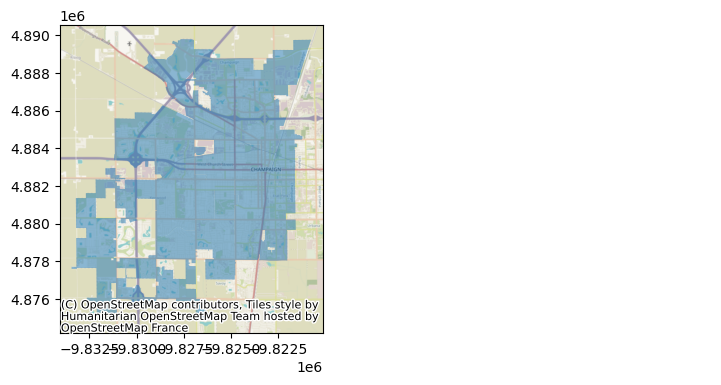

In [63]:
fig, ax = plt.subplots(figsize=(4,4))
gdf_councils_new.plot(ax=ax, alpha=0.5)
ctx.add_basemap(ax=ax) 
plt.show()

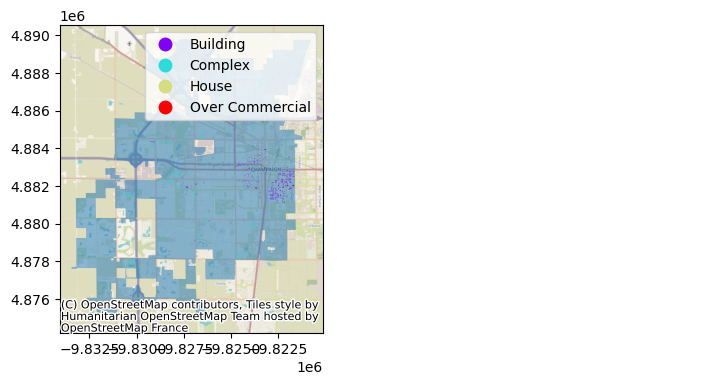

In [64]:
fig, ax = plt.subplots(figsize=(4,4))
gdf_councils_new.plot(ax=ax, alpha=0.5)
gdf_apts.to_crs(epsg=3857).plot(ax=ax, cmap='rainbow', column='Building_Type', legend=True)
ctx.add_basemap(ax=ax) 
plt.show()

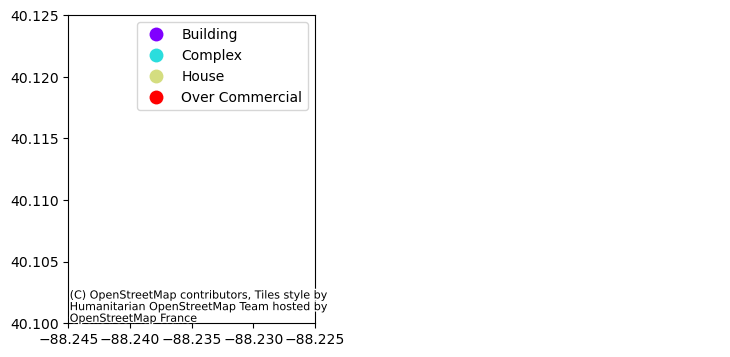

In [65]:
fig, ax = plt.subplots(figsize=(4,4))
gdf_councils_new.plot(ax=ax, alpha=0.5)
gdf_apts.to_crs(epsg=3857).plot(ax=ax, cmap='rainbow', column='Building_Type', legend=True)
ctx.add_basemap(ax=ax) 
ax.set_xlim(-88.245, -88.225)
ax.set_ylim(40.10, 40.125)
plt.show()

/opt/anaconda3/envs/DataViz/lib/python3.10/site-packages/contextily/tile.py:645: UserWarning: The inferred zoom level of 32 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


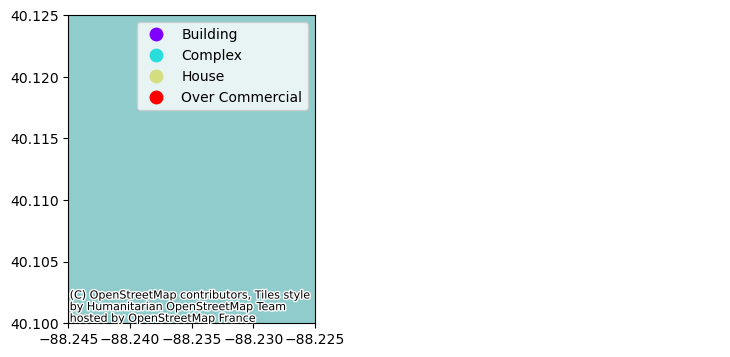

In [66]:
fig, ax = plt.subplots(figsize=(4,4))
gdf_councils_new.plot(ax=ax, alpha=0.5)
gdf_apts.to_crs(epsg=3857).plot(ax=ax, cmap='rainbow', column='Building_Type', legend=True)
ax.set_xlim(-88.245, -88.225)
ax.set_ylim(40.10, 40.125)
ctx.add_basemap(ax=ax) 
plt.show()

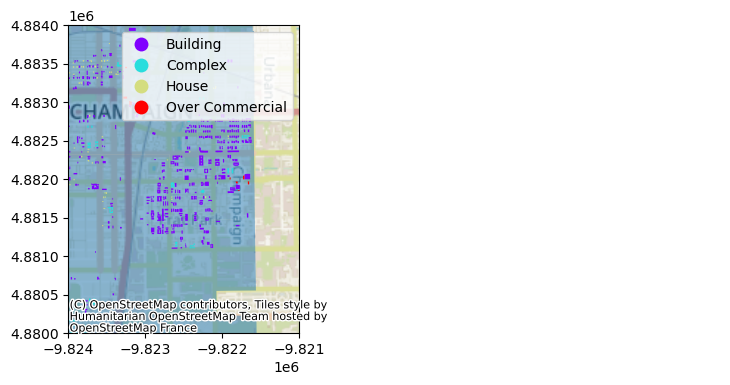

In [85]:
fig, ax = plt.subplots(figsize=(4,4))
gdf_councils_new.plot(ax=ax, alpha=0.5)
gdf_apts.to_crs(epsg=3857).plot(ax=ax, cmap='rainbow', column='Building_Type', legend=True)

ctx.add_basemap(ax=ax)

ax.set_xlim(-9.824e6, -9.821e6)
ax.set_ylim(4.88e6, 4.884e6)

plt.show()

In [76]:
#ctx.providers.OpenStreetMap

In [ ]:
#ctx.providers.MapTilesAPI.OSMEnglish

In [86]:
# fig, ax = plt.subplots(figsize=(4,4))
# gdf_councils_new.plot(ax=ax, alpha=0.5)
# gdf_apts.to_crs(epsg=3857).plot(ax=ax, cmap='rainbow', column='Building_Type', legend=True)
# ax.set_xlim(-88.0, -88.225)
# ax.set_ylim(40.10, 40.125)
# ctx.add_basemap(ax=ax)#, source=ctx.providers.MapTilesAPI.OSMEnglish) 
# plt.show()

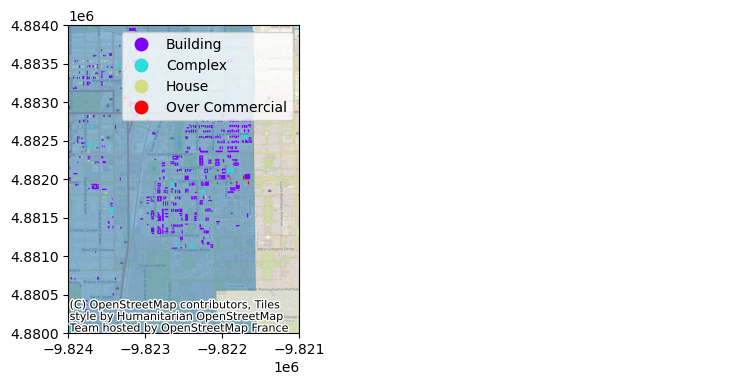

In [87]:
fig, ax = plt.subplots(figsize=(4,4))
gdf_councils_new.plot(ax=ax, alpha=0.5)
gdf_apts.to_crs(epsg=3857).plot(ax=ax, cmap='rainbow', column='Building_Type', legend=True)
ax.set_xlim(-9.824e6, -9.821e6)
ax.set_ylim(4.88e6, 4.884e6)
ctx.add_basemap(ax=ax)
plt.show()

## Geopandas + Contextily + ipywidgets

In [88]:
import ipywidgets

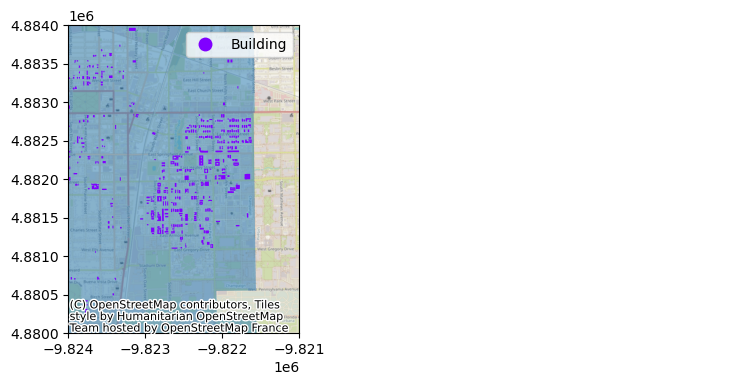

In [92]:
# 1. hardcode an option

btype = 'Building'

gdf_apt_subset = gdf_apts[gdf_apts['Building_Type']==btype]

fig, ax = plt.subplots(figsize=(4,4))
gdf_councils_new.plot(ax=ax, alpha=0.5)
gdf_apt_subset.to_crs(epsg=3857).plot(ax=ax, cmap='rainbow', column='Building_Type', legend=True)
ax.set_xlim(-9.824e6, -9.821e6)
ax.set_ylim(4.88e6, 4.884e6)
ctx.add_basemap(ax=ax)
plt.show()

In [93]:
#2. build a function with this hardcoded option as input

def make_b_plot(btype):    
    gdf_apt_subset = gdf_apts[gdf_apts['Building_Type']==btype]
    fig, ax = plt.subplots(figsize=(4,4))
    gdf_councils_new.plot(ax=ax, alpha=0.5)
    gdf_apt_subset.to_crs(epsg=3857).plot(ax=ax, cmap='rainbow', column='Building_Type', legend=True)
    ax.set_xlim(-9.824e6, -9.821e6)
    ax.set_ylim(4.88e6, 4.884e6)
    ctx.add_basemap(ax=ax)
    plt.show()

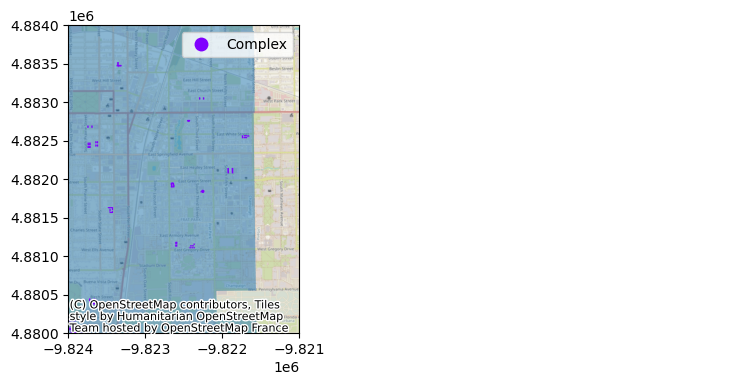

In [95]:
# 2.5 test function!

make_b_plot('Complex')

In [96]:
# 3. decorate function

@ipywidgets.interact(btype=gdf_apts['Building_Type'].unique())
def make_b_plot(btype):    
    gdf_apt_subset = gdf_apts[gdf_apts['Building_Type']==btype]
    fig, ax = plt.subplots(figsize=(4,4))
    gdf_councils_new.plot(ax=ax, alpha=0.5)
    gdf_apt_subset.to_crs(epsg=3857).plot(ax=ax, cmap='rainbow', column='Building_Type', legend=True)
    ax.set_xlim(-9.824e6, -9.821e6) # make sure any "zoom" is compatable with your CRS
    ax.set_ylim(4.88e6, 4.884e6)
    ctx.add_basemap(ax=ax)
    plt.show()

interactive(children=(Dropdown(description='btype', options=('Complex', 'Building', 'House', 'Over Commercial'…